In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import matplotlib.style as style
style.use('tableau-colorblind10')

In [60]:
def Mean_Pulse(df):
  y = df.iloc[:,0:32].mean()
  return y

def Individual_Pulse(df,num):
  y = df.iloc[num,0:32]
  return y

def Graph_Mean_Pulse(y):
  x = np.linspace(8,8*32,32)
  plt.figure(figsize=(20,10))
  plt.xticks(x,fontsize = 15)
  plt.yticks(fontsize = 18)
  plt.bar(x,y,width=8,edgecolor= 'black')
  plt.xlabel("Time[ns]",fontsize = 50)
  plt.title('Mean_Pulse',fontsize = 50)
  plt.ylabel("ADC",fontsize= 50)
  plt.show()

def Graph_Comparison_Mean_Pulse(y1,y2):
  x = np.linspace(8,8*32,32)
  plt.figure(figsize=(20,10))
  plt.xticks(x,fontsize = 15)
  plt.yticks(fontsize = 18)
  plt.bar(x,y1,width=8,alpha=0.3,edgecolor= 'black',label='Raw')
  plt.bar(x,y2,width=8,alpha=0.4,edgecolor= 'black',label='Cleaned')
  plt.legend(fontsize=50)
  plt.xlabel("Time[ns]",fontsize = 50)
  plt.title('Pulse Mean',fontsize = 50)
  plt.ylabel("ADC",fontsize= 50)
  plt.show()


def Error_Michel(popt):
  # Valores
  experimental = abs(1/popt[1])
  teorico = abs(1/0.00045)
  # Cálculos
  error_absoluto = abs(experimental - teorico)
  error_relativo = error_absoluto / abs(teorico)
  error_porcentual = error_relativo * 100
  print(f"Error porcentual   = {error_porcentual:.2f}%")

def diff_df(df):
  mask = df['deltaTime'] <= 10000
  counts, bin_edges = np.histogram(df[mask]['deltaTime'], bins=10)
  bin_centers = 0.5 * (bin_edges[:-1] + bin_edges[1:])
  diff_df = pd.DataFrame({'time': bin_centers,'counts': counts})
  return(diff_df)


def Integrated_Charge_Histogram(df_list, labels, colors, save_path, bin_width=100):

    plt.figure(figsize=(15, 8))

    for df, label, color in zip(df_list, labels, colors):
        charge = np.array(df['Charge'])

        # Definir bordes de bins
        bins = np.arange(min(charge), max(charge) + bin_width, bin_width)
        counts, bin_edges = np.histogram(charge, bins=bins)
        bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2

        # Graficar en escala logarítmica
        plt.semilogy(bin_centers, counts, label=label, color=color, linewidth=2)

    plt.ylabel("# of Entries", fontsize=50)
    plt.xlabel("Integrated Charge [ADC]", fontsize=50)
    plt.legend(fontsize=30)
    plt.xticks(fontsize=30)
    plt.yticks(fontsize=30)
    plt.grid(True, which='both', linestyle='--', linewidth=0.5)
    plt.tight_layout()

    if save_path is not None:
        plt.savefig(save_path, dpi=300)  # dpi=300 para alta resolución

    plt.show()

def Integrated_Charge_Histogram_Comparison(df):
    masks = {
        "Raw": (np.ones(len(df), dtype=bool), "#d55e00"),    # red
        "A3CAP": (df['A3CAP'] < 70, "#56B4E9"),                # blue
        "SPC-16": (df['SPC-16'] < 70, "#009e73"),   # green
        "SPC-24": (df['SPC-24'] < 70, "#CC79A7"),   # pink
        "SPC-32": (df['SPC-32'] < 70, "#0072B2"),   # dark_blue
    }


    plt.figure(figsize=(8, 4))

    for label, (mask, color_data) in masks.items():
        delta_times = np.array(df[mask]['deltaTime'])
        if len(delta_times) == 0:
            continue


        bin_size = 100
        min_dt = np.min(delta_times)
        max_dt = np.max(delta_times)
        bins_range = np.arange(min_dt, max_dt + bin_size, bin_size)
        counts, bin_edges = np.histogram(delta_times, bins=bins_range)
        bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2


        plt.semilogy(bin_centers, counts, label=f"{label}", linewidth=2.5, color=color_data)


    plt.xlabel("Time Difference [ns]", fontsize=30)
    plt.ylabel("# of Entries", fontsize=30)
    plt.xticks(range(0,25000,10000),fontsize=20)
    plt.yticks(fontsize=20)
    plt.grid(True, alpha=0.8)
    plt.legend(fontsize=15,markerscale=10,title_fontsize=20, loc='upper left', bbox_to_anchor=(1.01, 1))
    plt.tight_layout()


    plt.savefig("delta_time_pos.png", dpi=300, format='png', bbox_inches='tight')
    plt.show()
    print("Figura guardada como 'delta_time_pos.png'")

In [61]:
bins = pd.read_csv('/content/drive/MyDrive/Rayos Cósmicos/Datos/Raw_data.csv')

In [62]:
bins.drop('Unnamed: 0', axis=1, inplace=True)

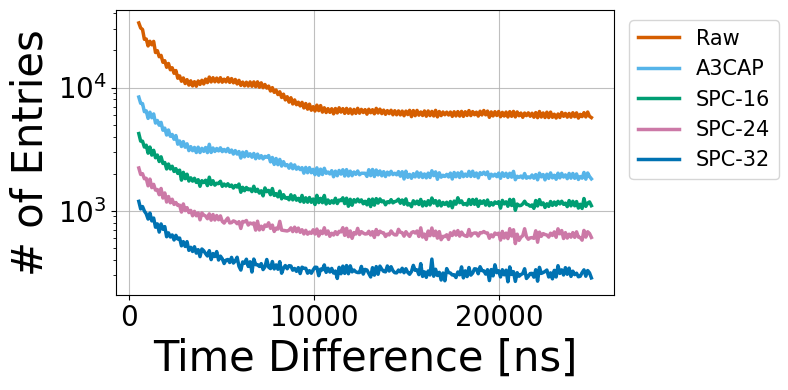

Figura guardada como 'delta_time_pos.png'


In [63]:
Integrated_Charge_Histogram_Comparison(bins)

In [65]:
bins = pd.read_csv("/content/drive/MyDrive/Rayos Cósmicos/Datos/Datos_Optics_Oficial_4.csv", encoding="utf-8")
bins.drop('Unnamed: 0', axis=1, inplace=True)
bins['Cluster'].value_counts()

,count
Cluster,
-1,40108
1,18435
0,15605


In [66]:
df_cleaned_1=bins[bins['Cluster']==-1]
df_cleaned_2=bins[bins['Cluster']==1]
df_cleaned_3=bins[bins['Cluster']==0]

In [69]:
dfs = [bins, df_cleaned_1, df_cleaned_2, df_cleaned_3]


labels = ["Original", "Noise", "1", "0"]

colors = ["#0072B2", "#999999", "#009E73", "#E69F00"]

Integrated_Charge_Histogram(dfs, labels, colors, bin_width=50, save_path="/content/drive/MyDrive/Rayos Cósmicos/histograma_carga.png")

KeyError: 'Charge'

<Figure size 1500x800 with 0 Axes>